In [ ]:
'''
File: Untitled-1.ipynb
Created Date: Monday, March 27th 2023, 11:19:20 am
Author: Wei Jiang
-----
Last Modified: Monday, 27th March 2023 11:19:20 am
Modified By: Wei Jiang
-----
Copyright (c) 2023
-----
HISTORY:
Date      	By	Comments
----------	---	----------------------------------------------------------
'''


In [83]:
import os
import numpy as np
import pandas as pd
from natsort import natsorted
import matplotlib.pyplot as plt
import sys
from scipy.integrate import simpson
from scipy.optimize import curve_fit
import glob

[24 23 22 21 20 19 18 17]
[24 23 22 21 20 19 18 17]
[24 23 22 21 20 19 18 17]
[24 23 22 21 20 19 18 17]
[24 23 22 21 20 19 18 17]
[24 23 22 21 20 19 18 17]
[24 23 22 21 20 19 18 17]
[24 23 22 21 20 19 18 17]


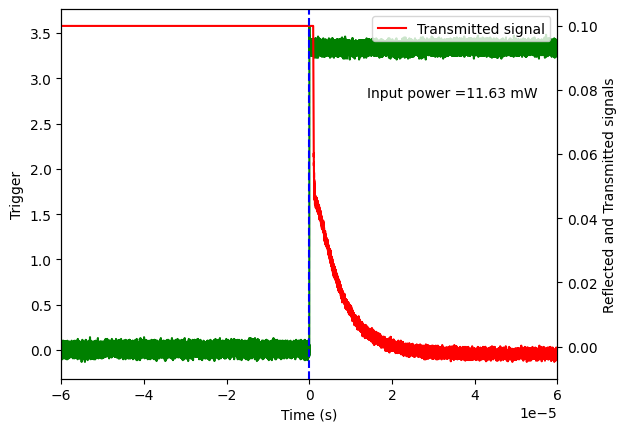

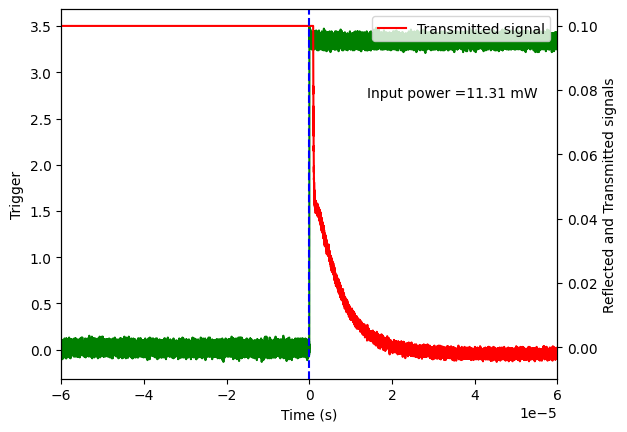

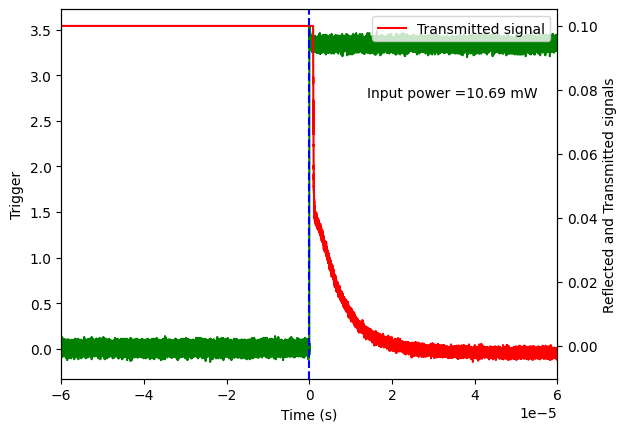

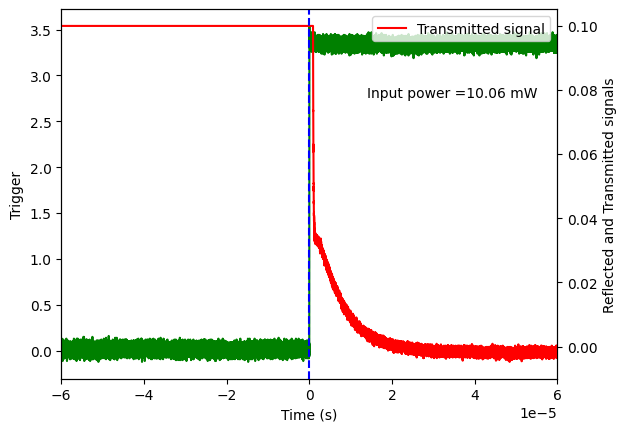

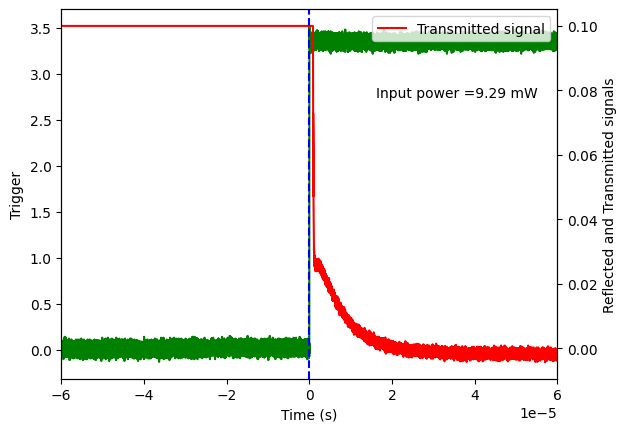

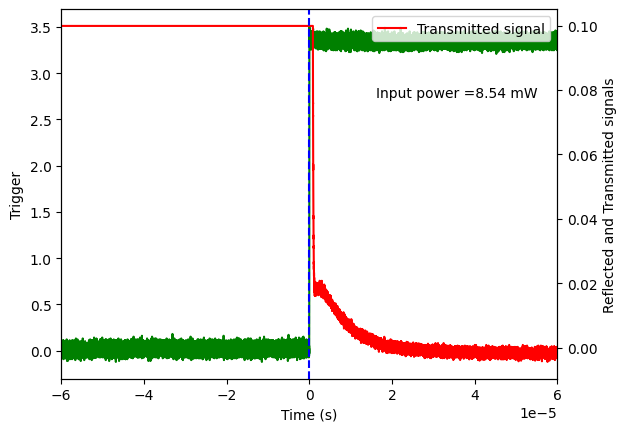

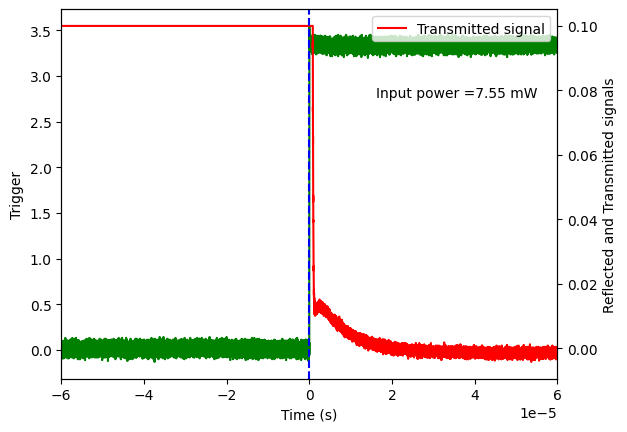

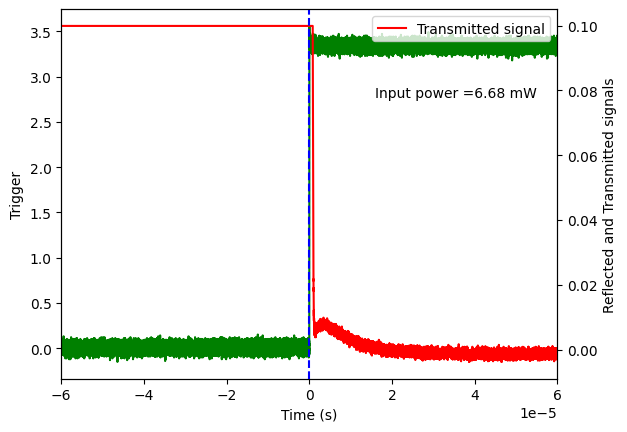

In [179]:
dir = 'C:\\Users\\wj2002\\Dropbox (Heriot-Watt University Team)\\RES_EPS_Quantum_Photonics_Lab\\Experiments\\Current Experiments\\BB Telecom QM\\2023_Pr_YVO_Sectroscopy\\Visible\\0.5%'
folder = '0324_Fluor_2'
root= dir + '\\' + folder+ '\\'
sub_folders=natsorted([ item for item in os.listdir(root) if os.path.isdir(os.path.join(root, item)) ])
num_of_subfolders=np.size(sub_folders)

input_power=np.array([0,0.00024,0.003,0.014,0.043,0.103,0.207,0.374,0.611,0.933,1.35,1.86,2.48,3.2,3.97,4.86,5.74,6.68,7.55,8.54,9.29,10.06,10.69,11.31,11.63])

ave=25 # average times
steps=25 # changing steps of the input laser power

start_0=24 # Check the fist valid input power, as when the input power is 0 then nothing will show;
# Find the dimensions of arrays for initialise the created arrays
path=dir + '\\' + folder + '\\' + sub_folders[start_0] + '\\'
file_list = os.listdir(path)
list_csv=natsorted([i for i in file_list if i.endswith('.csv')])
file_size=np.shape(list_csv)
data_file_len=file_size[0]
read_example=pd.read_csv(os.path.join(path,list_csv[0]))
read_example=read_example.to_numpy()
row_of_data, column_of_data=np.shape(read_example)

show_raw_data=1
stop_point=17 #!!IMPORTANT!!
if show_raw_data == 1:
    sub_folders_index=np.arange(num_of_subfolders-1,stop_point-1,-1)
    for index_0 in range(len(sub_folders_index)):
        print(sub_folders_index)
        # This loop is used to get the path for each measurement when changing the input power
        path=dir + '\\' + folder + '\\' + sub_folders[sub_folders_index[index_0]] + '\\'
        file_list = os.listdir(path)
        list_csv=natsorted([i for i in file_list if i.endswith('.csv')])
        read_example=pd.read_csv(os.path.join(path,list_csv[0]))
        read_example=read_example.to_numpy()

        trigger_val=max(read_example[:,1])
        trigger_pos=np.flatnonzero((read_example[:-1,1] < trigger_val*0.7) & (read_example[1:,1] > trigger_val*0.7))+1

        fig, ax = plt.subplots()
        ax1=ax.twinx()
        #ax.plot(read_example[:,0],read_example[:,1])
        ax.plot(read_example[:,0],read_example[:,1],'g')

        #ax1.plot(read_example[:,0],read_example[:,3],label='Reflected reference')
        ax1.plot(read_example[:,0],read_example[:,2],'r',label='Transmitted signal')
        ax1.axvline(read_example[trigger_pos[0],0],color='b',linestyle='dashed')

        ax1.legend()
        ax.set_xlim([-6E-5,6E-5])
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Trigger')
        ax1.set_ylabel('Reflected and Transmitted signals')

        ax.annotate('Input power ='+"{:.2f}".format(input_power[sub_folders_index[index_0]])+' mW',
                xy=(1, 0.7), xycoords='axes fraction',
                xytext=(-20, 20), textcoords='offset pixels',
                horizontalalignment='right',
                verticalalignment='bottom')

In [180]:
#sub_folders_index=np.arange(num_of_subfolders-1,stop_point-1,-1)
#print(sub_folders_index)

data_time=np.empty([num_of_subfolders,row_of_data,data_file_len])
data_trigger=np.empty([num_of_subfolders,row_of_data,data_file_len])
data_reflected=np.empty([num_of_subfolders,row_of_data,data_file_len])
data_transmitted=np.empty([num_of_subfolders,row_of_data,data_file_len])

# Save all raw data into 3-D arrays 
for index_0 in range(len(sub_folders_index)):
    # This loop is used to get the path for each measurement when changing the input power
    path=dir + '\\' + folder + '\\' + sub_folders[sub_folders_index[index_0]] + '\\'
    file_list = os.listdir(path)
    list_csv=natsorted([i for i in file_list if i.endswith('.csv')])
    print(sub_folders_index[index_0])
    for index_1, file_1 in enumerate(list_csv):
        # This loop is used to read and average the traces saved for one input power
        data_path=os.path.join(path,file_1)
        data=pd.read_csv(data_path)
        data=data.to_numpy()

        data_time[index_0,:,index_1]=data[:,0]
        data_trigger[index_0,:,index_1]=data[:,1]
        data_transmitted[index_0,:,index_1]=data[:,2]
        data_reflected[index_0,:,index_1]=data[:,3]
        

24
23
22
21
20
19
18
17


24
fitted T1 = 25.321713289773047 us
fitted T1 error = 0.008060788159385072 us
23
fitted T1 = 25.698861339380198 us
fitted T1 error = 0.008600293230682518 us
22
fitted T1 = 26.129649747679736 us
fitted T1 error = 0.00925942740791853 us
21
fitted T1 = 27.07289388475797 us
fitted T1 error = 0.01015973124840084 us
20
fitted T1 = 28.870949142172883 us
fitted T1 error = 0.01298672464320786 us
19
fitted T1 = 30.418501525995158 us
fitted T1 error = 0.012040888922097454 us
18
fitted T1 = 30.66412203726324 us
fitted T1 error = 0.015366740331329055 us
17
fitted T1 = 31.26536239164063 us
fitted T1 error = 0.023646529955803863 us


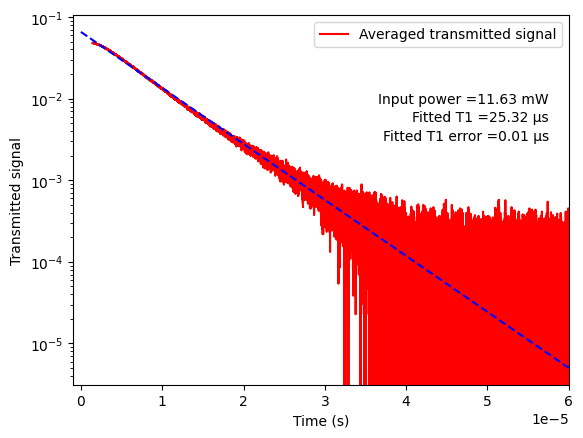

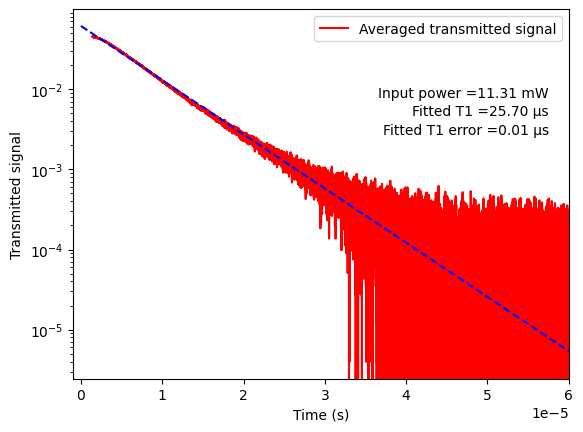

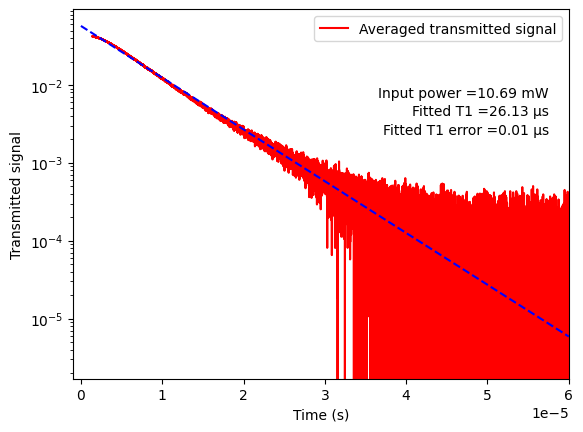

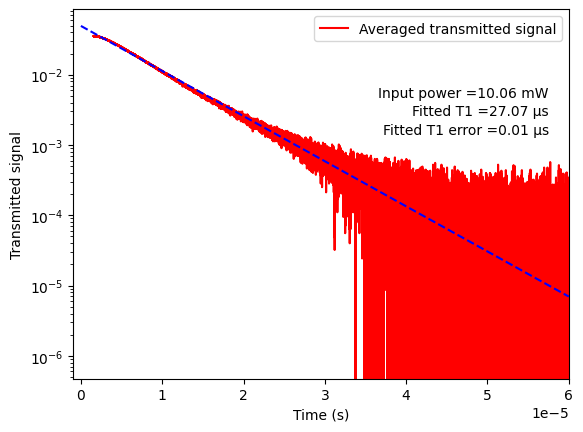

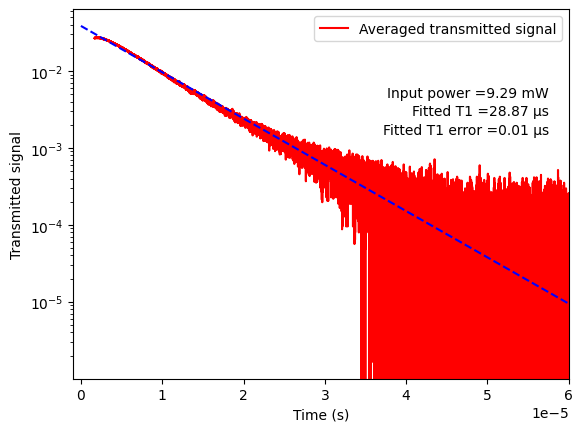

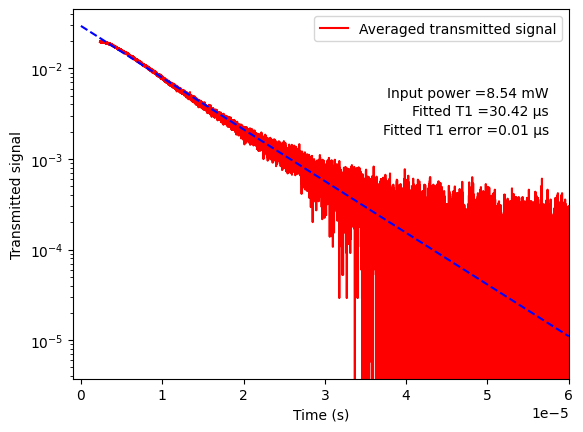

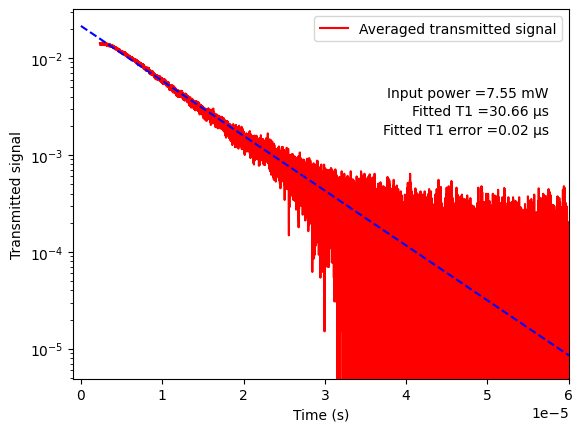

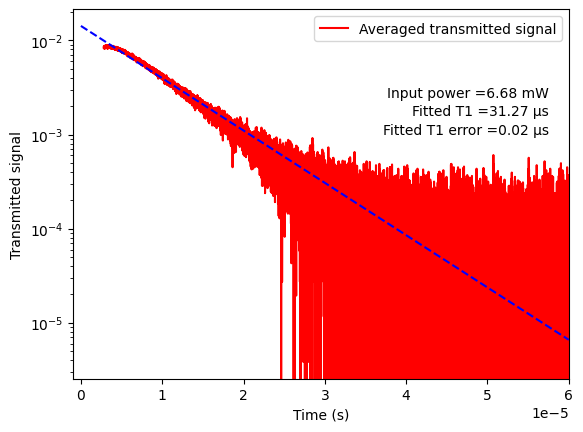

In [184]:
data_transmitted_sum=np.empty([row_of_data,num_of_subfolders-stop_point])
data_transmitted_ave=np.empty([row_of_data,num_of_subfolders-stop_point])
trigger_offset=[1200,1180,1180,1300,1400,1950,1950,2350]

input_power_plot=np.empty(num_of_subfolders-stop_point)
T1_fit=np.empty(num_of_subfolders-stop_point)
T1_err_true=np.empty(num_of_subfolders-stop_point)
T1_fit_amp=np.empty(num_of_subfolders-stop_point)
area=np.empty(num_of_subfolders-stop_point)

# Define the fitting fuction
def T1_fitting(x,y0,T1):
    return y0*np.exp(-4*x/T1)

for index_0 in range(len(sub_folders_index)):
    print(sub_folders_index[index_0])
    for index_1 in range(steps):
        
        data_transmitted_sum[:,index_0]=data_transmitted[index_0,:,0]
        index_2=1
        while index_2<ave:
           data_transmitted_sum[:,index_0]=data_transmitted_sum[:,index_0]+data_transmitted[index_0,:,index_2]
           index_2=index_2+1
        data_transmitted_ave[:,index_0]=data_transmitted_sum[:,index_0]/ave

    input_power_plot[index_0]=input_power[num_of_subfolders-index_0-1]   

    # trigger_val=max(data_transmitted_ave[:,index_0])
    # trigger_pos_0=np.flatnonzero((data_transmitted_ave[:-1,index_0] < trigger_val*0.8) & (data_transmitted_ave[1:,index_0] > trigger_val*0.8))+1
    trigger_corrected=trigger_pos[0]+trigger_offset[index_0]
    data_time_plot=data_time[index_0,trigger_corrected:,0]
    data_transmitted_ave_1=data_transmitted_ave[trigger_corrected:,index_0]

    data_transmitted_bg=data_transmitted_ave[row_of_data-2000:,index_0]
    data_transmitted_bg_ave=np.sum(data_transmitted_bg)/(len(data_transmitted_bg))

    data_transmitted_ave_plot=data_transmitted_ave_1-data_transmitted_bg_ave

    T1_fit_0,T1_err=curve_fit(T1_fitting, data_time_plot, data_transmitted_ave_plot, p0=[0.02,1e-5],sigma=None)
    T1_fit[index_0]=T1_fit_0[1]
    T1_fit_amp[index_0]=T1_fit_0[0]
    T1_err_true_0=np.sqrt(np.diag(T1_err))
    T1_err_true[index_0]=T1_err_true_0[1]
    print('fitted T1 =', T1_fit[index_0]*1e6, 'us')
    print('fitted T1 error =', T1_err_true[index_0]*1e6, 'us')
    xx=np.arange(0,6e-5,10e-7)
    T1_fit_curve=T1_fit_amp[index_0]*np.exp(-4*xx/T1_fit[index_0])

    area[index_0]=simpson(data_transmitted_ave_plot, data_time_plot)

    fig, ax = plt.subplots()
    ax.plot(data_time_plot,data_transmitted_ave_plot,'r',label='Averaged transmitted signal')
    ax.plot(xx,T1_fit_curve,'b--')
    # ax.axvline(data_time_plot[trigger_pos[0]],color='b',linestyle='dashed')
    ax.legend()
    ax.set_xlim([-0.1E-5,6E-5])
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Transmitted signal')
    ax.set_yscale('log')

    ax.annotate('Input power ='+"{:.2f}".format(input_power[sub_folders_index[index_0]])+' mW',
                xy=(1, 0.7), xycoords='axes fraction',
                xytext=(-20, 20), textcoords='offset pixels',
                horizontalalignment='right',
                verticalalignment='bottom')
    ax.annotate('Fitted T1 ='+"{:.2f}".format(T1_fit[index_0]*1e6)+' \u03BCs',
            xy=(1, 0.65), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')
    ax.annotate('Fitted T1 error ='+"{:.2f}".format(T1_err_true[index_0]*1e6)+' \u03BCs',
            xy=(1, 0.6), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')


Text(0, 0.5, 'Relaxation Area')

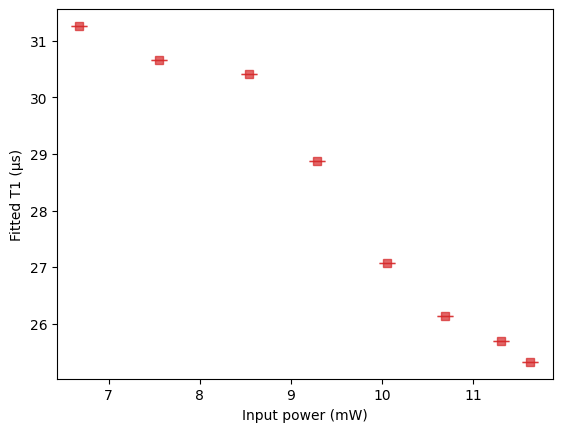

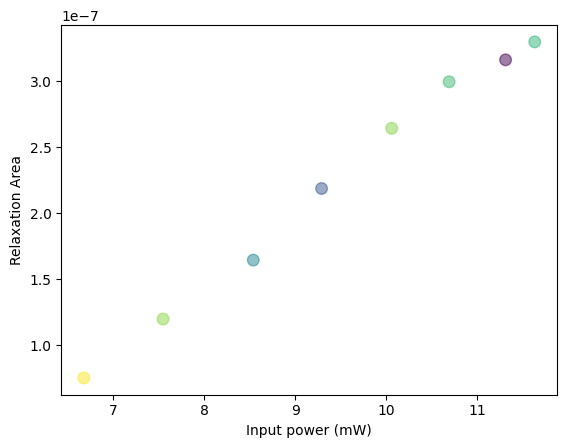

In [185]:
fig, ax = plt.subplots()
ax.errorbar(input_power_plot, T1_fit*1e6, yerr=T1_err_true,c='tab:red',fmt='s',alpha=0.7,linewidth=2, capsize=6)
ax.set_xlabel('Input power (mW)')
ax.set_ylabel('Fitted T1 (\u03BCs)')

fig, ax = plt.subplots()
colors = np.random.rand(8)
ax.scatter(input_power_plot,area, s=70, marker='o',c=colors, alpha=0.5)
ax.set_xlabel('Input power (mW)')
ax.set_ylabel('Relaxation Area')